<!-- ![wget](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEpm4llbLYVfjA8sTswPdUlfzEqrhjYneOqg&usqp=CAU) -->
<img src="https://1000logos.net/wp-content/uploads/2017/01/FIFA-logo.jpg" alt="Smiley face" width="900" height="400" style="vertical-align:center">

## Football (FIFA-2019) Data 
The following data consists of **90** Features containing various aspects of performance of player like player's skills, age, club, wage, potential, etc. 

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os




In [2]:
# to measure linear / non-linear relationship B/W two columns
# !pip install ppscore
# import ppscore as ppsc

In [3]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from scipy.stats import norm
import plotly.express as ex
import plotly 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

sns.set(style= 'whitegrid', color_codes=True)
sns.set_theme(context='notebook',style='darkgrid',
              palette='deep',font='sans-serif',font_scale=1,color_codes=True,rc=None)
%matplotlib inline

#### 1. Data Importing

In [4]:
df= pd.read_csv('../input/football-fifa-2019-dataset/FIFA_Processed_Data.csv')
df.sample(4)

,Unnamed: 0,Unnamed: 0.1,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
10060,10060,10060,214046,J. Mosquera,27,https://cdn.sofifa.org/players/4/19/214046.png,Colombia,https://cdn.sofifa.org/flags/56.png,65,68,...,70.0,65.0,55.0,59.0,6.0,6.0,11.0,8.0,10.0,€784K
2278,2278,2278,230503,Jadson Vidigal,26,https://cdn.sofifa.org/players/4/19/230503.png,Brazil,https://cdn.sofifa.org/flags/54.png,74,74,...,65.0,16.0,12.0,12.0,8.0,8.0,8.0,15.0,9.0,€10.8M
17410,17410,17410,241543,A. Lyons,17,https://cdn.sofifa.org/players/4/19/241543.png,Republic of Ireland,https://cdn.sofifa.org/flags/25.png,54,66,...,46.0,52.0,53.0,53.0,12.0,7.0,15.0,13.0,10.0,€158K
12309,12309,12309,242238,O. Solet,18,https://cdn.sofifa.org/players/4/19/242238.png,France,https://cdn.sofifa.org/flags/18.png,63,83,...,56.0,54.0,64.0,57.0,12.0,14.0,10.0,14.0,15.0,€2M


In [5]:
print('Shape:', df.shape,'\n')
print(df.columns)

Shape: (18207, 90) 

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'Name', 'Age', 'Photo',
       'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', '

### Que-1: Which clubs are the most economical? How did you decide that?

In [6]:
# Data Processing for insiding
df.fillna(value=0, inplace=True)

# we have to convert these values into integers for further processing
df[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head(3) 

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,90,90,90,94,95,95,95,94,95,95,...,66,63,63,63,66,61,49,49,49,61
1,94,94,94,92,93,93,93,92,91,91,...,68,64,64,64,68,64,56,56,56,64
2,87,87,87,92,92,92,92,92,92,92,...,68,63,63,63,68,63,50,50,50,63


In [7]:
def num_conversion(x):
    if type(x) == str:
        return eval(x)
    else:
        return x

In [8]:
# Converting the following columns from string to the integer value for evaluation.
columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM','RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

# string to int convrsion
for col in columns :
    df[col] = df[col].apply(num_conversion) 

In [9]:
# Resulted Dataframe
df[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head(1) 

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,90,90,90,94,95,95,95,94,95,95,...,66,63,63,63,66,61,49,49,49,61


In [10]:
# need for Height and Weight Conversion to integer
df[['Height', 'Weight']].head(2)

,Height,Weight
0,67,159
1,74,183


In [11]:
def height_convr(x):
    if type(x)== str:
        y= x.split("'")
        return int(y[0]) * 12 + int(y[1])
    else:
        return int(x)

def weight_convr(x):
    if type(x) == str:
        return int(x.split('lbs')[0])
    else:
        return int(x)

In [12]:
df['Height'] = df['Height'].apply(height_convr)
df['Weight'] = df['Weight'].apply(weight_convr)

In [13]:
# Preprocessing the data to fill with meaningful data where some redundancy is there.
df['Body Type'][df['Body Type'] == 'Messi'] = 'Normal'
df['Body Type'][df['Body Type'] == 'Ronaldo'] = 'Lean'
df['Body Type'][df['Body Type'] == 'C. Ronaldo'] = 'Lean'
df['Body Type'][df['Body Type'] == 'Neymar'] = 'Lean'
df['Body Type'][df['Body Type'] == 'Courtois'] = 'Normal'
df['Body Type'][df['Body Type'] == 'PLAYER_BODY_TYPE_25'] = 'Normal'
df['Body Type'][df['Body Type'] == 'Shaqiri'] = 'Lean'
df['Body Type'][df['Body Type'] == 'Akinfenwa'] = 'Normal'
df['Body Type'][df['Body Type'] == 0] = 'Normal'
df['Preferred Foot'][df['Preferred Foot'] == 0] = 'NA'
df['Work Rate'][df['Work Rate'] == 0] = 'Medium/ Medium'
df['Real Face'][df['Real Face'] == 0] = 'No'
df['Position'][df['Position'] == 0] = 'NA'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [14]:
# Evaluating the Wage and Value attributes to their proper integer value
wage = df['Wage'].replace('€','')
df['Wage'] = wage.replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int) 

In [15]:
value = df['Value'].replace('€','') # replacing '€' symbol with ''

df['Value'] = wage.replace({'K': '*1e3', 'M': '*1e6'}, 
                           regex=True).map(pd.eval).astype(int)

In [16]:
df['Club'].nunique() 
# There are 652 unique clubs present in the dataset

652

In [17]:
clubData = {'Club': df.Club, 'Overall' : df.Overall, 
            'Wage': df.Wage}

clubDataDf = pd.DataFrame(clubData, columns = ['Club', 'Overall', 'Wage'])
clubDataDf.sample(3)

,Club,Overall,Wage
17665,Central Coast Mariners,53,1000
12301,Deportes Tolima,63,1000
124,Olympique Lyonnais,84,93000


In [18]:
# fifadata.Club.value_counts()
dct = dict(df.Club.value_counts())
def findValue(x):
    return dct[x]

In [19]:
clubDataDf.dropna(inplace = True)
overallList =[]
p = 0

''' Dividing the Overall of each row by the Club count so 
 that when we do groupby, we get the appropriate mean 
 Overall value for the club ( kind a normalization )''' 

for i in clubDataDf.values:
    overallList.append( i[1] / findValue( i[0] ) ) 
    
x = np.reshape(overallList, (len(overallList), 1)) 
new_club_data = clubDataDf.drop(columns = ['Overall'], inplace = False)
new_club_data['Overall'] = x

In [20]:
new_club_data['Overall'].isnull().unique().sum()

0

In [21]:
# Grouping the data by the Clubs and taking their sum

new_club_df = new_club_data.groupby(by = 'Club', 
                                      as_index=False).sum() 

new_club_df['Economy'] = new_club_df['Overall'] / new_club_df['Wage']

Note: <br>
- Interpreatation of Economy : How much overall a Club can get for every Euro spent.

In [22]:
# Top 15 economical Clubs
top_15_club= new_club_df.sort_values(by=['Economy'], ascending=True).head(15) 

In [23]:
ex.bar(x = top_15_club.Club, y = top_15_club.Economy, 
       width=650, height=500, labels={'y':'Economy', 'x':'Clubs'}
       , color=top_15_club.Economy, )

- Real Madrid has Best Economy

### Que-2: 
- What is the relationship between age and individual potential of the player? 
- How does age influence the players' value? 
- At what age does the player exhibit peak pace ?  

In [24]:
# Age, Potential, SprintSpeed
data = {'Age': df.Age, 'Potential' : df.Potential}

perf_df = pd.DataFrame(data, columns = ['Age', 'Potential'])
perf_df.sample(3)

,Age,Potential
1209,22,82
12782,20,79
2989,24,78


In [25]:
ex.box(x='Age', y='Potential', data_frame= perf_df, color='Age', boxmode='overlay', notched=True, )

<AxesSubplot:xlabel='Age', ylabel='Potential'>

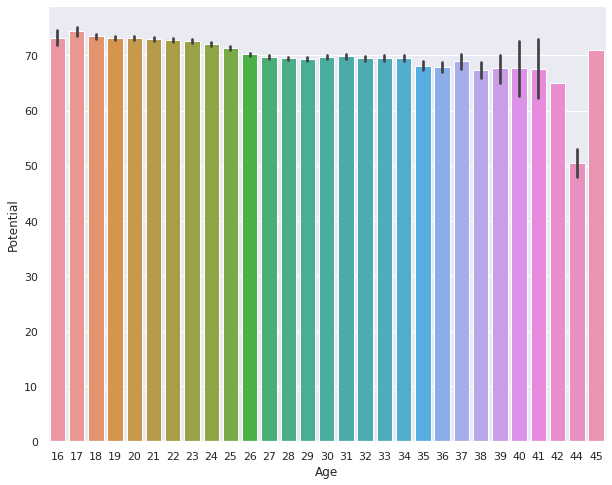

In [26]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'Age', y = 'Potential', data = perf_df)

### From Above Plots:
- We can observe that the Age is inversely proportional to the Potential of the player. 
- A player shows average peak potential at the age of 17 and the maximum potential at the age of 19 which can be seen as an outlier in the boxplot. After that it decreases and remain almost the same till the age of 34. 
- There are also a lot of outliers which indicates that despite being of higher ager, the player shows higher potential which is an exception for some cases.

<b> We can also observe the same through the correlation matrix below.

In [27]:
scaler = StandardScaler()

perf_df_standardised = scaler.fit_transform(perf_df[['Age','Potential']])
perf_df_standardised = pd.DataFrame(perf_df_standardised, columns = ['Age', 'Potential'])
perf_df_standardised.corr()

,Age,Potential
Age,1.000000,-0.253312
Potential,-0.253312,1.000000


<AxesSubplot:>

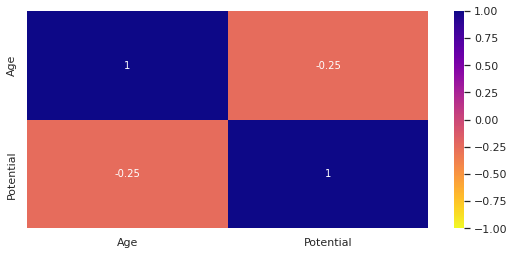

In [28]:
# As it is negative value in the correlation matrix, 
# we can conclude that Age and Potential are inversely proportional.
plt.figure(figsize=(9,4))
sns.heatmap(perf_df.corr(),vmin=-1,cmap='plasma_r',annot=True)

In [29]:
perf_df['Value'] = df['Value']
perf_df.sample(3)

,Age,Potential,Value
9562,26,71,5000
10522,22,75,10000
7567,25,71,4000


In [30]:
ex.scatter(x='Age', y='Value', data_frame=perf_df,
           color='Age', opacity=0.5, marginal_x='box')

- There is a steep increase in the Value of a Player till the age of 27-28 years and after that it gradually starts decreasing, It hits the lowest at the age of 45 and the Value hits the highest in the age between 25-30.

In [31]:
ageValue_df = scaler.transform(perf_df[['Age','Value']])
ageValue_df = pd.DataFrame(ageValue_df, columns = ['Age','Value'])
ageValue_df.corr()

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Value
Feature names seen at fit time, yet now missing:
- Potential




,Age,Value
Age,1.000000,0.141145
Value,0.141145,1.000000


<AxesSubplot:>

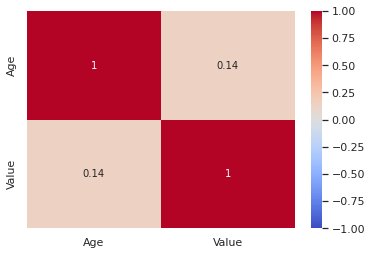

In [32]:
# not a very strong relationship. With the heatmap it can seen that they are Value is not impacted much by Age.
sns.heatmap(ageValue_df.corr(), vmin=-1,cmap='coolwarm',annot=True)

In [33]:
perf_df['Pace'] = df.SprintSpeed

In [34]:
mean_pace = np.mean(perf_df['Pace'])
mean_pace = round(mean_pace, 1)
perf_df['Pace'].fillna(value = mean_pace, inplace = True)
perf_df.sample(3)

,Age,Potential,Value,Pace
6722,32,68,12000,44.0
12878,26,64,2000,73.0
7448,25,71,2000,76.0


<Figure size 1080x360 with 0 Axes>

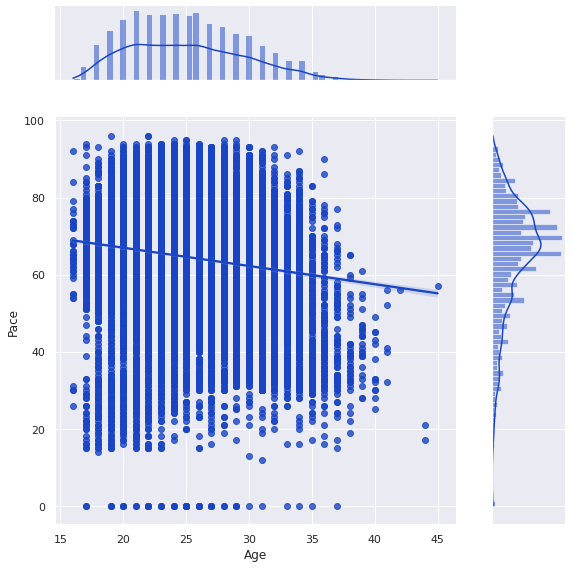

In [35]:
plt.figure(figsize=(15,5))
sns.jointplot(x= perf_df['Age'], y= perf_df['Pace'], 
              kind = 'reg', space=0.5, color='#1945c5', ratio=4, height=8)
plt.show()

- The player attains maximum pace towards the age of 20years(20-24years approx).
- It can be seen that the Pace data is right skewed with mean almost at 65.
- The pace of a player is at the lowest at the age of 45

### Que-3:  
- What skill sets are helpful in deciding a player's potential? 
- How do the traits contribute to the players' potential?

In [36]:
# skill sets to decide a player's potential 
skill_df = df[["Crossing","Finishing","HeadingAccuracy","ShortPassing","Volleys","Dribbling","Curve","FKAccuracy",
                         "LongPassing","BallControl","Acceleration","SprintSpeed","Agility","Reactions","Balance","ShotPower",
                         "Jumping","Stamina","Strength","LongShots","Aggression","Interceptions","Positioning","Vision",
                         "Penalties","Composure","Marking","StandingTackle","SlidingTackle","GKDiving","GKHandling","GKKicking",
                         "GKPositioning","GKReflexes", "Potential"]]
skill_df.drop_duplicates().sample(3)

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Potential
17777,45.0,32.0,48.0,63.0,35.0,45.0,34.0,35.0,49.0,44.0,...,48.0,56.0,63.0,52.0,13.0,15.0,11.0,14.0,6.0,74
2749,74.0,57.0,49.0,76.0,56.0,71.0,72.0,68.0,78.0,74.0,...,72.0,64.0,61.0,58.0,13.0,6.0,7.0,16.0,10.0,76
15265,49.0,57.0,55.0,54.0,52.0,58.0,51.0,34.0,43.0,57.0,...,51.0,12.0,19.0,13.0,7.0,7.0,13.0,10.0,13.0,79


In [37]:
# replacing the null values with the minimum of the column values
for index in skill_df.columns :
    skill_df[index].fillna(value = skill_df[index].min(), inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

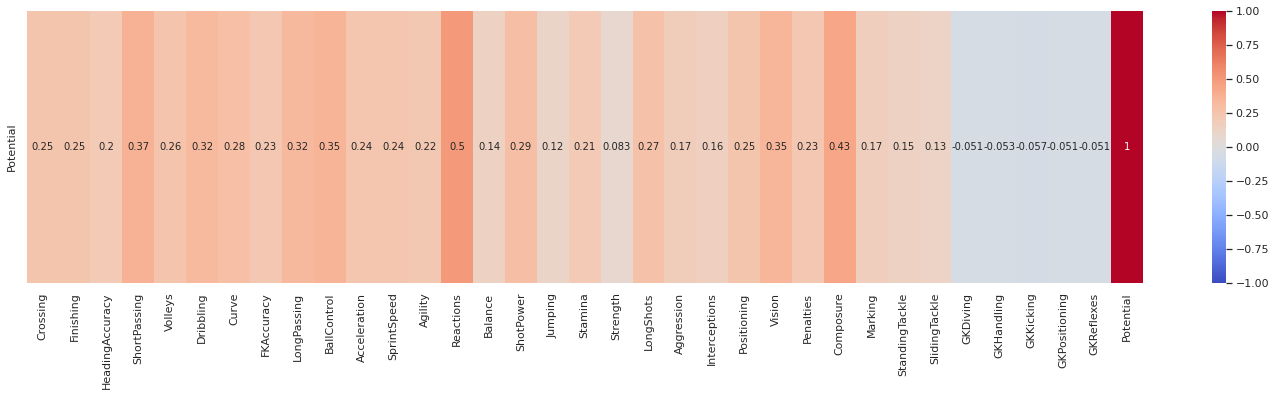

In [38]:
plt.figure(figsize=(25,5))
a = skill_df.corr().loc['Potential':]
sns.heatmap(a, vmin=-1, cmap='coolwarm', annot = True)

- From the Heatmap, we can observe that Reactions, Composure, Vision and ShortPassing are the only columns which have comparatively greater impact on the Potentail of a player

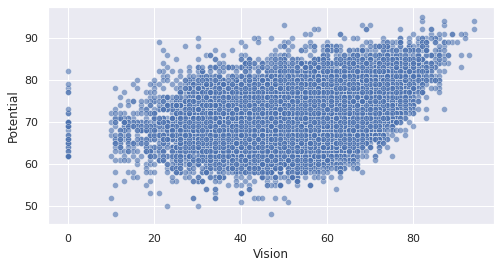

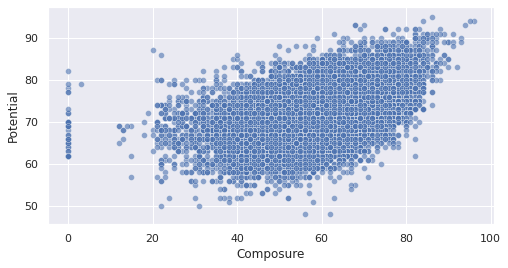

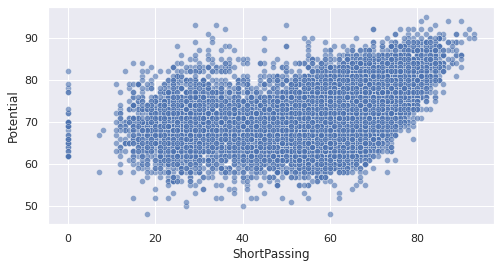

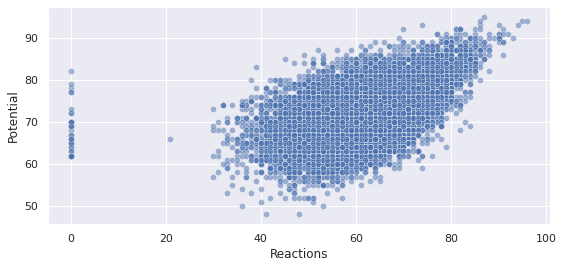

In [39]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'Vision', y = 'Potential', data = skill_df, alpha=0.6)
plt.show()
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'Composure', y = 'Potential', data = skill_df, alpha=0.6)
plt.show()
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'ShortPassing', y = 'Potential', data = skill_df, alpha=0.6)
plt.show()
plt.figure(figsize=(9,4))
sns.scatterplot(x = 'Reactions', y = 'Potential', data = skill_df, palette='Bules_d', alpha=0.5)
plt.show()

In [40]:
# Traits vs Player's Potential
trails_potential_df = {'Special' : df['Special'], 'Height' : df['Height'], 'Weight' : df['Weight'],
                      'Agility' : df['Agility'], 'Composure' : df['Composure'], 'Potential' : df['Potential']}
trails_potential_df = pd.DataFrame(trails_potential_df)
trails_potential_df.sample(4)

,Special,Height,Weight,Agility,Composure,Potential
5921,1105,78,187,48.0,61.0,71
14149,1470,69,146,70.0,50.0,61
417,1991,69,146,78.0,69.0,88
5884,1687,65,132,67.0,71.0,72


In [41]:
scaler = StandardScaler()
trails_potential_df[['Special', 'Weight', 'Height', 'Agility', 'Composure', 'Potential']] = scaler.fit_transform(trails_potential_df[['Special', 'Weight', 'Height', 'Agility', 'Composure', 'Potential']])
trails_potential_df.sample(4)

,Special,Height,Weight,Agility,Composure,Potential
14401,-0.733036,0.626007,-0.030516,0.043957,-0.295821,-0.538971
8707,0.642714,-0.702681,-0.875757,0.772365,-0.041800,-0.701934
8915,-1.866654,-0.038337,1.829014,-1.147984,-1.650599,0.112885
956,-1.492450,0.847455,0.983773,0.375051,-0.295821,1.905488


In [42]:
potential = trails_potential_df.corr().loc['Potential':]
potential

,Special,Height,Weight,Agility,Composure,Potential
Potential,0.383727,0.024638,0.011892,0.224803,0.434343,1.0


<AxesSubplot:>

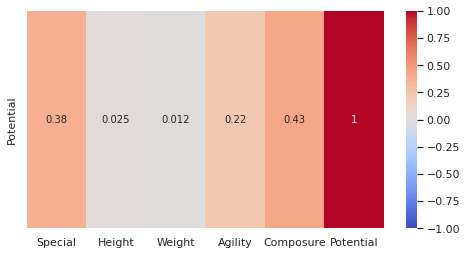

In [43]:
plt.figure(figsize=(8,4))
sns.heatmap(potential, vmin=-1, cmap='coolwarm', annot = True)

- From the heatmap, we can observe that Composure, Special and Agility have the highest impact among others towards the Potential of a player.

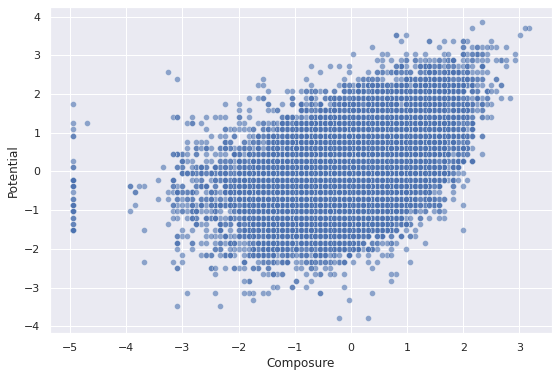

In [44]:
plt.figure(figsize=(9,6))
sns.scatterplot(x = 'Composure', y = 'Potential', data = trails_potential_df, alpha=0.6)
plt.show()

<AxesSubplot:xlabel='Special', ylabel='Potential'>

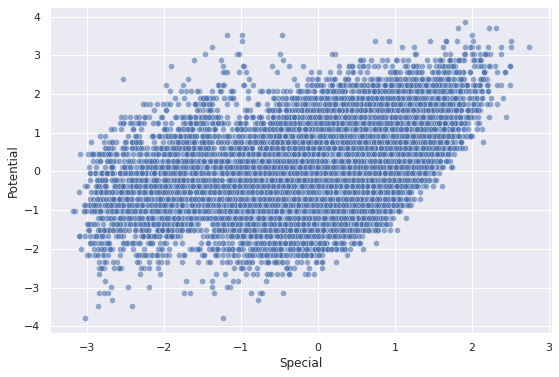

In [45]:
plt.figure(figsize=(9,6))
sns.scatterplot(x = 'Special', y = 'Potential', data = trails_potential_df, alpha=0.6)

### Que-4:
- Which features directly contribute to the wages of the players?

In [46]:
wage_data = {'Potential' : df['Potential'], 'Overall' : df['Overall'], 'Value' : df['Value'],
             'Special' : df['Special'], 'International Reputation' : df['International Reputation'],
             'Wage' : df['Wage']}
wage_df = pd.DataFrame(wage_data)
wage_df.sample(3)

,Potential,Overall,Value,Special,International Reputation,Wage
1009,77,77,74000,1978,2.0,74000
9417,66,66,4000,1563,1.0,4000
17367,66,54,1000,1413,1.0,1000


In [47]:
# Need to replace null values. 
# we will fill it with International Reputation as 0
wage_df['International Reputation'].unique()

array([5., 4., 3., 2., 1., 0.])

In [48]:
wage_df['International Reputation'].fillna(value=0, inplace=True)

In [49]:
wage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential                 18207 non-null  int64  
 1   Overall                   18207 non-null  int64  
 2   Value                     18207 non-null  int64  
 3   Special                   18207 non-null  int64  
 4   International Reputation  18207 non-null  float64
 5   Wage                      18207 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 853.6 KB


In [50]:
# encoding the category type columns for training the model
for object_feature in wage_df.dtypes[wage_df.dtypes == 'object'].index :
    wage_df[object_feature] = wage_df[object_feature].astype('category') 

In [51]:
wage_df.info()
for object_feature in wage_df.dtypes[wage_df.dtypes == 'category'].index :
    wage_df[object_feature] = pd.get_dummies(wage_df[object_feature])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential                 18207 non-null  int64  
 1   Overall                   18207 non-null  int64  
 2   Value                     18207 non-null  int64  
 3   Special                   18207 non-null  int64  
 4   International Reputation  18207 non-null  float64
 5   Wage                      18207 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 853.6 KB


In [52]:
scaler = StandardScaler()
wage_df[['Value', 'Wage', 'Special']] = scaler.fit_transform(wage_df[['Value', 'Wage', 'Special']])
wage_df.sample(4)

,Potential,Overall,Value,Special,International Reputation,Wage
17503,72,54,-0.305987,-0.600964,1.0,-0.305987
8673,68,67,-0.260530,1.060942,1.0,-0.260530
8090,75,67,-0.396902,0.268510,1.0,-0.396902
14393,79,61,-0.351444,-0.380844,1.0,-0.351444


<AxesSubplot:>

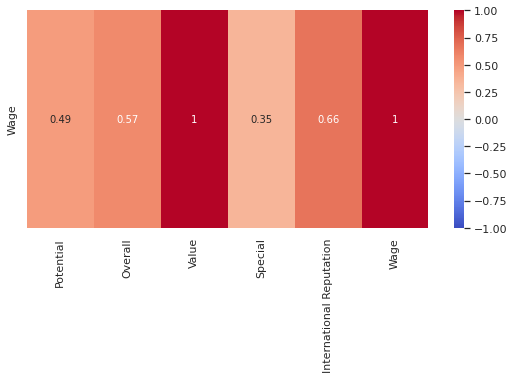

In [53]:
wage_corr_matrix = wage_df.corr().loc['Wage':]
plt.figure(figsize=(9,4))
sns.heatmap(wage_corr_matrix, vmin=-1, cmap='coolwarm', annot = True)

<AxesSubplot:xlabel='Value', ylabel='Wage'>

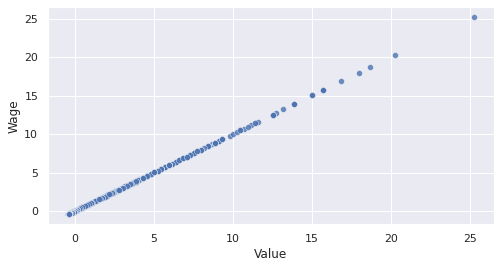

In [54]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'Value', y ='Wage', data = wage_df, alpha=0.8)

- So the Wage of a player is directly proprtional to the Value of a player. If the value of the player increases, the wage of the player also increases monotonically. This is also seen from the Heatmap.

<AxesSubplot:xlabel='International Reputation', ylabel='Wage'>

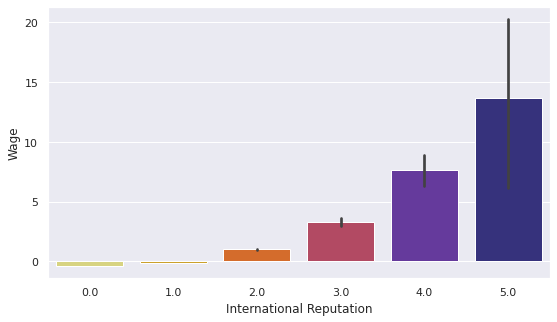

In [55]:
plt.figure(figsize=(9,5))
sns.barplot(x = 'International Reputation', y ='Wage', 
            palette='CMRmap_r' ,data = wage_df)

- Same goes for the International Feature of the player. 
- The value increases if the Internaional Reputation of a player increases

### Que-5:
- What is the age distribution in different clubs?
- Which club has most players young?

In [56]:
data = {'Age': df['Age'], 'Club' : df['Club']}
age_club_df = pd.DataFrame(data)
age_club_df.sort_values(by='Age').sample(3)

,Age,Club
8943,21,Hallescher FC
13653,23,FK Austria Wien
2850,33,AIK


In [57]:
# grouping the data by clubs and getting their mean age
datas = age_club_df.groupby(by='Club', as_index=False).mean() 
datas = datas.sort_values(by = 'Age', ascending = True)

# sorting the grouped by club data according to age in order to get youngest age group club in the beginning
datas.head(10) 

,Club,Age
232,FC Nordsjælland,20.259259
222,FC Groningen,21.423077
84,Bohemian FC,21.480000
238,FC Sochaux-Montbéliard,21.678571
211,FC Admira Wacker Mödling,21.925926
349,LOSC Lille,22.000000
203,Envigado FC,22.035714
560,Stabæk Fotball,22.074074
72,Barnsley,22.107143
189,Derry City,22.111111


- FC Nordsjælland club has the most young players

In [58]:
ex.bar(x = 'Club', y = 'Age', data_frame= datas.head(15),
      color='Club')